In [1]:
import requests

In [2]:
mhkdr_api = 'https://mhkdr.openei.org/api?action=getSubmissionsForPRIMRE'
tethys_api = 'https://tethys.pnnl.gov/api/primre_export'
tethys_e_api = 'https://tethys-engineering.pnnl.gov/api/primre_export'

In [3]:
mhkdr_response = requests.get(mhkdr_api)
tethys_response = requests.get(tethys_api)       # Note: The tethys api grabs content specifically related to marine energy, and there is another API for wind energy.
tethys_e_response = requests.get(tethys_e_api)

mhkdr_response_json = mhkdr_response.json()
tethys_response_json = tethys_response.json()
tethys_e_response_json = tethys_e_response.json()

print(f'Number of MHKDR Entries: {len(mhkdr_response_json)}\nNumber of Tethys Entries: {len(tethys_response_json)}\nNumber of Tethys Engineering Entries: {len(tethys_e_response_json)}')

Number of MHKDR Entries: 392
Number of Tethys Entries: 4231
Number of Tethys Engineering Entries: 8193


In [4]:
mhkdr_response_json[0]

{'URI': 'https://mhkdr.openei.org/submissions/545',
 'type': ['Dataset', 'Dataset/Archive'],
 'landingPage': 'https://mhkdr.openei.org/submissions/545',
 'sourceURL': 'https://mhkdr.openei.org/submissions/545',
 'title': 'Wave Measurements taken NW of Culebra Is., PR, 2023',
 'description': 'Wave and sea surface temperature measurements collected by a Sofar Spotter buoy in 2023. The buoy was deployed on July 27, 2023 at 11:30 UTC northwest of Culebra Island, Puerto Rico, (18.3878 N, 65.3899 W) and recovered on Nov 5, 2023 at 12:45 UTC. \n\nData are saved here in netCDF format, organized by month, and include directional wave statistics, GPS, and SST measurements at 30-minute intervals. Figures produced from these data are provided here as well. They include timeseries of wave height/period/direction and SST, GPS location, wave roses, and directional spectra. Additionally, raw CSV files from the Spotter\'s memory card can also be found below.\n\nNetCDF files can be read in python using 

In [7]:
tethys_response_json[0]

NameError: name 'tethys_response_json' is not defined

In [ ]:
tethys_e_response_json[0]

## Dissecting the JSON to be made into a tabular format

In [8]:
import pandas as pd
import regex as re
#pd.set_option('display.max_rows', 500)

In [9]:
len(mhkdr_response_json)

389

In [24]:
mhkdr_dataframe = pd.DataFrame(mhkdr_response_json)
mhkdr_dataframe.head(3)

,URI,type,landingPage,sourceURL,title,description,author,organization,originationDate,spatial,technologyType,tags,signatureProject,modifiedDate
0,https://mhkdr.openei.org/submissions/545,"[Dataset, Dataset/Archive]",https://mhkdr.openei.org/submissions/545,https://mhkdr.openei.org/submissions/545,"Wave Measurements taken NW of Culebra Is., PR,...",Wave and sea surface temperature measurements ...,"[James McVey, Molly Grear, Mikaela Freeman, Ly...",[Pacific Northwest National Laboratory],2023-07-27 06:00:00,"{'extent': 'point', 'coordinates': [18.3878, -...",[Wave],"[wave, puerto rico, sea surface temperature, w...",[],2024-04-01 14:59:21
1,https://mhkdr.openei.org/submissions/534,"[Dataset, Dataset/Archive, Document/Report]",https://mhkdr.openei.org/submissions/534,https://mhkdr.openei.org/submissions/534,TEAMER: Biofouling Analysis for Wave Energy Pi...,Biofouling and corrosion are a major concern f...,"[Tyler Robertson, Robertson Cavagnaro, Linnea ...","[Triton Systems, Inc.]",2021-11-01 06:00:00,"{'boundingCoordinatesNE': [50.38149245701351, ...",[],"[MHK, Marine, Hydrokinetic, energy, power, wav...",[],2024-02-27 23:09:36
2,https://mhkdr.openei.org/submissions/532,"[Dataset, Dataset/Archive, Document/Report, Da...",https://mhkdr.openei.org/submissions/532,https://mhkdr.openei.org/submissions/532,TEAMER: Supporting model output files for Envi...,Orbital Marine Power (Orbital) is seeking to d...,"[Taiping Wang, Zhaoqing Yang, Andrea Copping, ...",[Pacific Northwest National Laboratory],2023-03-01 07:00:00,"{'extent': 'point', 'coordinates': [60.6922101...",[],"[MHK, Marine, Hydrokinetic, energy, power, TEA...",[TEAMER],2024-02-29 20:30:34


In [127]:
mhkdr_dataframe['landingPage'][0]

'https://mhkdr.openei.org/submissions/545'

In [128]:
q = re.compile(r'\d+')
q

regex.Regex('\\d+', flags=regex.V0)

In [129]:
m2 = q.findall(a)

In [130]:
int(m2[0])

545

### Authors
This field is a true list. Which is awesome because it means I will not have to use regex to create a list for this column to dissect this field.

In [43]:
mhkdr_dataframe['author'][0][3]

'Lysel Garavelli'

### Organization
~~This field is layed out as str, even if there are more than one organzation associated with the entry. This necessitates some regex on my part to disentangle entries with multiple organizations~~

~~There are two entries in the MHKDR dataset that are associated with 2 organizations. To handle this exception, I skimmed through all of the entries in the "Organizations" field, and noted that the only entries that use a comma (,) are those that:~~
1. ~~Have two entries~~
2. ~~are a company, where the comma is folled by "Inc." e.g. ", Inc."~~
3. ~~are a limitted liability company, where the comma is followed by "LLC" e.g. ", LLC"~~

This was wrong. The organizations are atomic, but the names are complex because some organizations completed work in collaboration with a broader working group. I do not think it is relevant to get into this detail now. I also don't think there is enough data to make such detail meaningful.

In [11]:
mhkdr_dataframe['organization']

0      [Pacific Northwest National Laboratory]
1                       [Triton Systems, Inc.]
2      [Pacific Northwest National Laboratory]
3                   [University of Washington]
4                    [Oregon State University]
                        ...                   
384                  [Dehlsen Associates, LLC]
385                  [Dehlsen Associates, LLC]
386                  [Dehlsen Associates, LLC]
387                  [Dehlsen Associates, LLC]
388     [National Renewable Energy Laboratory]
Name: organization, Length: 389, dtype: object

### Tags
Like 'Author,' the 'Tags' field is layed out as a list. This is awesome because it means that I do not need to do regex to create a list for this field.

In [42]:
mhkdr_dataframe['tags'][0][0]

'wave'

# Cleaned 

In [17]:
def find_entry_id(entry_url):
    '''
    This function takes in the url of a MHKDR entry, and returns the entry_id of that page. 
    The 'entry_id' is the integer at the end of the url, which is unique to each MHKDR entry.
    The regex used in this function relies on the fact that the only number in the url is the id.
    '''
    rule = re.compile(r'\d+')
    matches_rule = rule.findall(entry_url)
    entry_id = int(matches_rule[0])

    return entry_id

In [18]:
def construct_authors_table(mhkdr_dataframe):
    '''
    This function creates a normalized table for the json element "author," connected to an "entry_id" that 
    may be called as a primary key to join this table to others. This disentangles the nested list structure
    present in the json to enable reporting e.g. associations among researchers, number of documents 
    attributed to each author.
    '''
    authors_of_entries = list(mhkdr_dataframe['author'])
    landing_page_urls = list(mhkdr_dataframe['sourceURL'])
    
    entry_ids = list()  # This list will contain duplicate entry ids, as it represents the final column that will map to entry
    authors = list()    # This list will contain duplicate authors when an author contributes to multiple entries
    
    for i in range(0, len(mhkdr_dataframe)):
        # Construct "entry_id" - This will be a primary key for all future merge operations.
        entry_id = find_entry_id(landing_page_urls[i])
        
        # Construct "author" column
        num_authors = len(authors_of_entries[i])
        for j in range(0, num_authors):
            entry_ids.append(entry_id)
            authors.append(authors_of_entries[i][j])
    
    final_df = pd.DataFrame({'entry_id':entry_ids, 'author':authors})
    
    return final_df

In [19]:
def construct_organizations_table(mhkdr_dataframe):
    '''
    This function creates a normalized table for the json element "organization," connected to an "entry_id" that 
    may be called as a primary key to join this table to others. This disentangles the nested list structure
    present in the json to enable reporting e.g. associations among researchers, number of documents 
    attributed to each author.
    '''
    orgs_of_entries = list(mhkdr_dataframe['organization'])
    landing_page_urls = list(mhkdr_dataframe['sourceURL'])
    
    entry_ids = list()  # This list will contain duplicate entry ids, as it represents the final column that will map to entry
    orgs = list()    # This list will contain duplicate authors when an author contributes to multiple entries
    
    for i in range(0, len(mhkdr_dataframe)):
        # Construct "entry_id" - This will be a primary key for all future merge operations.
        entry_id = find_entry_id(landing_page_urls[i])
        
        # Construct "organization" column
        org = orgs_of_entries[i][0]

        entry_ids.append(entry_id)
        orgs.append(org)
    
    final_df = pd.DataFrame({'entry_id':entry_ids, 'organization':orgs})
    
    return final_df

In [20]:
def construct_tags_table(mhkdr_dataframe):
    '''
    This function creates a normalized table for the json element "tags," connected to an "entry_id" that 
    may be called as a primary key to join this table to others. This disentangles the nested list structure
    present in the json to enable reporting e.g. associations among researchers, number of documents 
    attributed to each author.
    '''
    tags_of_entries = list(mhkdr_dataframe['tags'])
    landing_page_urls = list(mhkdr_dataframe['sourceURL'])
    
    entry_ids = list()  # This list will contain duplicate entry ids, as it represents the final column that will map to entry
    tags = list()    # This list will contain duplicate authors when an author contributes to multiple entries
    
    for i in range(0, len(mhkdr_dataframe)):
        # Construct "entry_id" - This will be a primary key for all future merge operations.
        entry_id = find_entry_id(landing_page_urls[i])
        
        # Construct "tag" column
        num_tags = len(tags_of_entries[i])
        for j in range(0, num_tags):
            entry_ids.append(entry_id)
            tags.append(tags_of_entries[i][j])
    
    final_df = pd.DataFrame({'entry_id':entry_ids, 'tag':tags})
    
    return final_df

## Cleaned - Tests

In [98]:
authors_tbl = construct_authors_table(mhkdr_dataframe)
construct_authors_table(mhkdr_dataframe)

,entry_id,author
0,545,James McVey
1,545,Molly Grear
2,545,Mikaela Freeman
3,545,Lysel Garavelli
4,534,Tyler Robertson
...,...,...
994,2,Tyler Mayer
995,1,Jon Weers
996,1,Nicole Taverna
997,1,Jay Huggins


In [92]:
orgs_tbl = construct_organizations_table(mhkdr_dataframe)
construct_organizations_table(mhkdr_dataframe)

,entry_id,organization
0,545,Pacific Northwest National Laboratory
1,534,"Triton Systems, Inc."
2,532,Pacific Northwest National Laboratory
3,531,University of Washington
4,530,Oregon State University
...,...,...
384,14,"Dehlsen Associates, LLC"
385,5,"Dehlsen Associates, LLC"
386,3,"Dehlsen Associates, LLC"
387,2,"Dehlsen Associates, LLC"


In [47]:
construct_tags_table(mhkdr_dataframe)

,entry_id,tag
0,545,wave
1,545,puerto rico
2,545,sea surface temperature
3,545,wave energy
4,545,wave measurements
...,...,...
10967,1,best practices
10968,1,guide
10969,1,API
10970,1,management


## EDA

In [48]:
from matplotlib import pyplot as plt

In [36]:
tags_tbl = construct_tags_table(mhkdr_dataframe)

In [42]:
all_tags = list(tags_tbl['tag'].unique())
len(all_tags)

2544

In [51]:
all_tags2 = tags_tbl.groupby(tags_tbl['tag'].tolist(),as_index=False).size().sort_values('size')

In [52]:
all_tags2

,index,size
0,/kW,1
1524,heading,1
1523,hawaii natural energy institute,1
1521,hardware-in-the-loop,1
1520,hardware,1
...,...,...
1926,power,344
441,Marine,354
354,Hydrokinetic,356
425,MHK,364


<BarContainer object of 2544 artists>

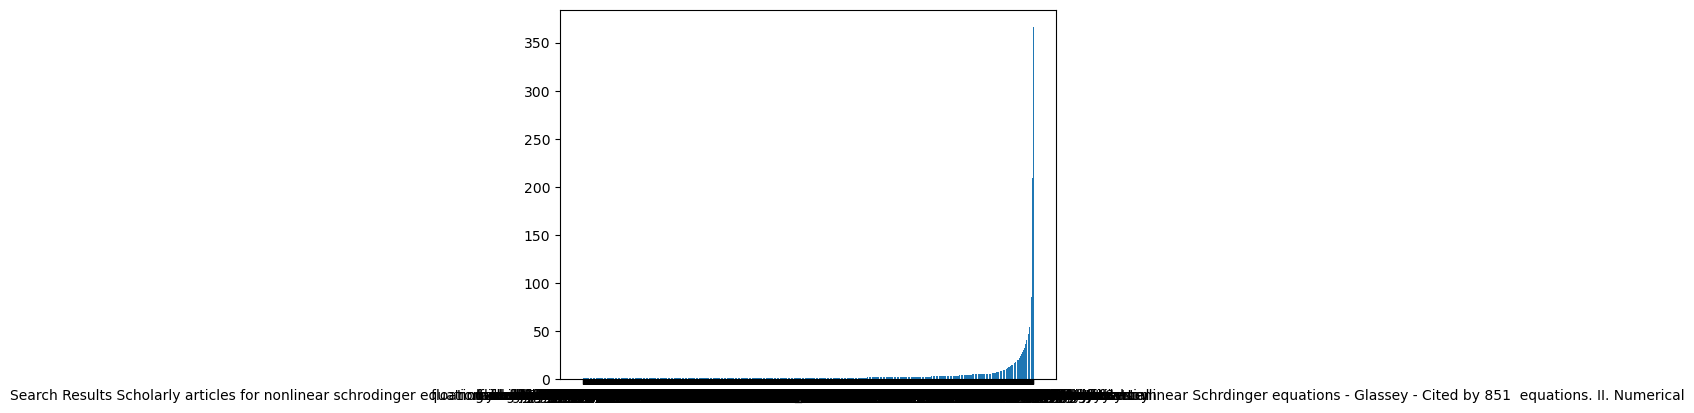

In [57]:
plt.bar(all_tags2['index'], all_tags2['size'], label='')

In [87]:
lens = list()
lens2 = list()
for i in range(0, 2543):
    lens.append(len(all_tags2['index'][i]))
    lens2.append(all_tags2['index'][i])

In [88]:
lens[748]

241

In [89]:
lens2[748]

'Search Results Scholarly articles for nonlinear schrodinger equation  for a derivative nonlinear Schrdinger equation - Kaup - Cited by 1114  Cauchy problem for nonlinear Schrdinger equations - Glassey - Cited by 851  equations. II. Numerical'

In [90]:
all_tags2[all_tags2['index']=='Search Results Scholarly articles for nonlinear schrodinger equation  for a derivative nonlinear Schrdinger equation - Kaup - Cited by 1114  Cauchy problem for nonlinear Schrdinger equations - Glassey - Cited by 851  equations. II. Numerical']

,index,size
748,Search Results Scholarly articles for nonlinea...,1


In [79]:
a = list(all_tags2['index'])

In [81]:
a[748]

'planning'

In [100]:
all_auth = authors_tbl.groupby(authors_tbl['author'].tolist(),as_index=False).size().sort_values('size')

<BarContainer object of 382 artists>

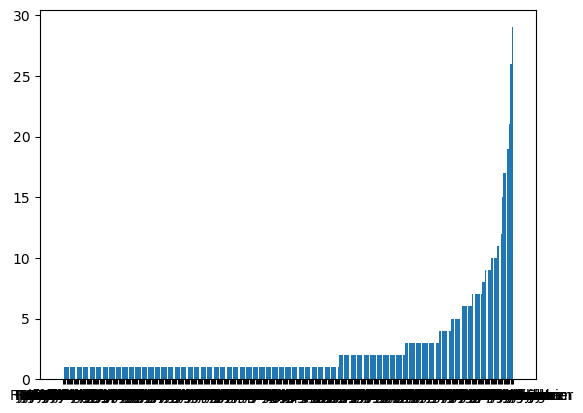

In [101]:
plt.bar(all_auth['index'], all_auth['size'])

In [103]:
all_auth.tail(5)

,index,size
348,Thomas Boerner,19
250,Mirko Previsic,21
367,Wesley Scharmen,26
346,Terry Lettenmaier,26
153,Jarlath McEntee,29
